In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image  
from sklearn import tree

In [6]:
#!pip install pydot

In [11]:
iris=pd.read_csv("iris.csv")
sd=iris.columns
sd
#iris.tail()

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [12]:
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [13]:
iris=iris.drop(['Unnamed: 0'],axis=1)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
iris.isnull().any()

Sepal.Length    False
Sepal.Width     False
Petal.Length    False
Petal.Width     False
Species         False
dtype: bool

In [9]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [10]:
print(iris.shape)

(150, 5)


In [11]:
print(iris.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
#iris.Species

In [17]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

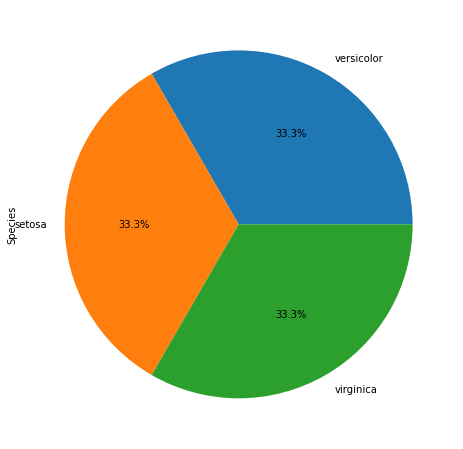

In [14]:
iris.Species.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8))

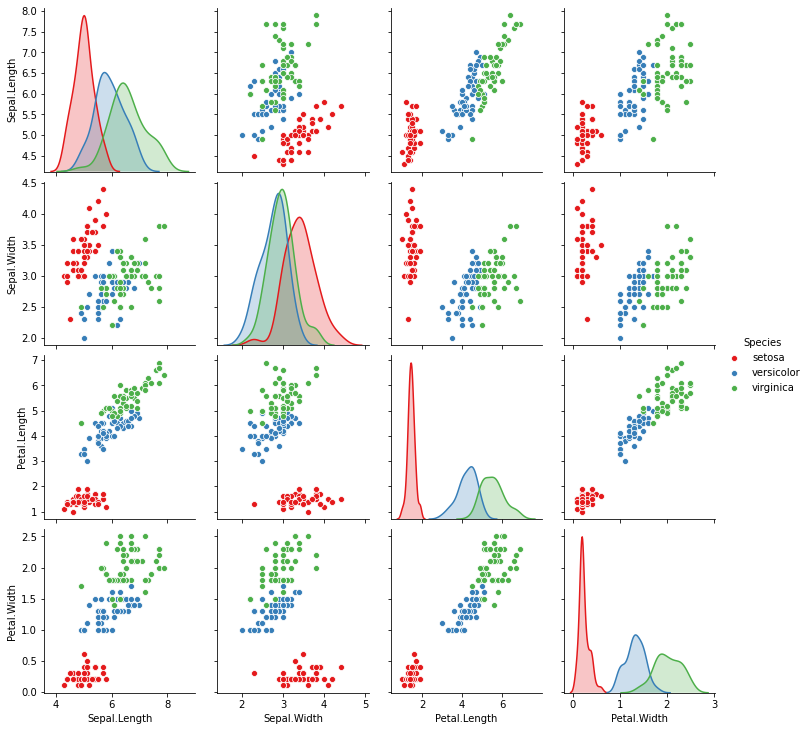

In [15]:
sns.pairplot(iris,hue='Species',palette='Set1')

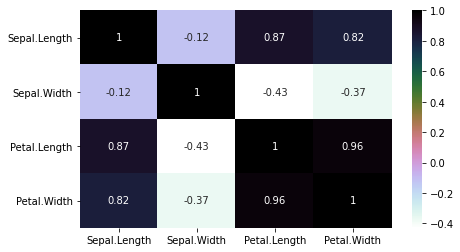

In [16]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

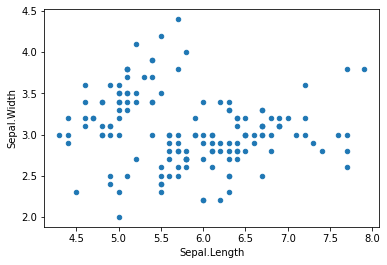

In [17]:
iris.plot(kind="scatter", x="Sepal.Length", y="Sepal.Width")

# Train Test Split
Let's split up the data into a training set and a test set!


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = iris.drop('Species',axis=1)
y = iris['Species']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Decision Trees

We'll start just by training a single decision tree.


In [21]:
from sklearn.tree import DecisionTreeClassifier  

In [22]:
dtree = DecisionTreeClassifier()


In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [24]:
print(X_test)
predictions = dtree.predict(X_test)
predictions

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
29            4.7          3.2           1.6          0.2
48            5.3          3.7           1.5          0.2
78            6.0          2.9           4.5          1.5
94            5.6          2.7           4.2          1.3
131           7.9          3.8           6.4          2.0
128           6.4          2.8           5.6          2.1
148           6.2          3.4           5.4          2.3
82            5.8          2.7           3.9          1.2
31            5.4          3.4           1.5          0.4
98            5.1          2.5           3.0          1.1
46            5.1          3.8           1.6          0.2
38            4.4          3.0           1.3          0.2
136           6.3          3.4           5.6          2.4
81            5.5          2.4           3.7          1.0
32            5.2          4.1           1.5          0.1


array(['setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         5
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [27]:
print(confusion_matrix(y_test,predictions))

[[6 0 0]
 [0 5 0]
 [0 0 4]]


In [28]:
#User input Prediction

In [35]:
data=[float(num) for num in (input("enter the data in order :Sepal.Length  Sepal.Width  Petal.Length  Petal.Width\t:").strip().split())]
predictions = dtree.predict([data])
print(predictions)

enter the data in order :Sepal.Length  Sepal.Width  Petal.Length  Petal.Width	:5.1 3.5 1.4 .2
['setosa']


In [30]:
#!pip3 install graphviz

In [31]:
decision_tree = tree.export_graphviz(dtree,out_file='iris.dot',feature_names=X_train.columns,max_depth=3,filled=True)

In [32]:
!dot -Tpng iris.dot -o iris.png

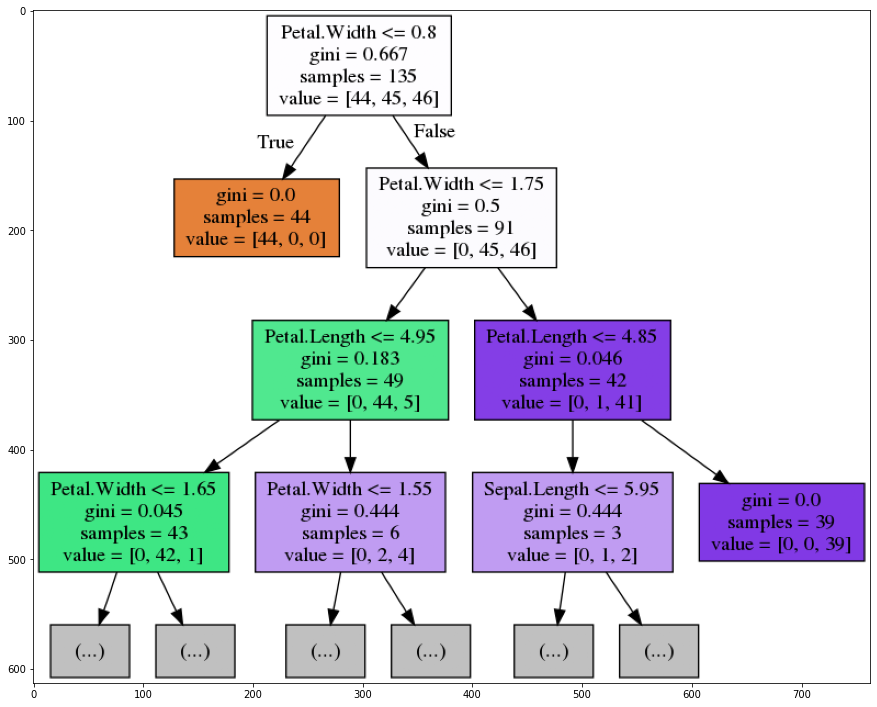

In [33]:
image = plt.imread('iris.png')
plt.figure(figsize=(15,15))
plt.imshow(image)